In [247]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7),(1,8),(8,9),(9,7)]

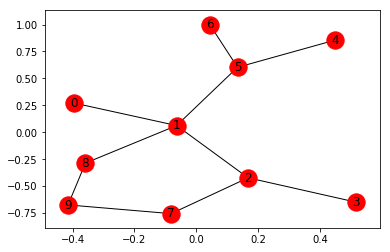

In [248]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [249]:
# how many points in graph? x points
MATRIX_SIZE = 10

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [250]:
print(R)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [251]:
a = [1,2,3,4,5,6,7,0]
a[::-1]

[0, 7, 6, 5, 4, 3, 2, 1]

In [252]:
# assign zeros to paths and 100 to goal-reaching point

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7),(1,8),(8,9),(9,7)]

for point in points_list:
    #print(point,point[1])
    #(2,7),
    if point[1] == goal:#7==7
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal: #0==7
        #print(point[0])
        R[point[::-1]] = 100
    else:
        # reverse of point
        #print(point[::-1])
        R[point[::-1]]= 0 #1,0

# add goal point round trip
R[goal,goal]= 100



In [253]:
gamma = 0.8
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
initial_state = 5

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


In [254]:
available_act = available_actions(5) 

In [255]:
available_act

array([1, 4, 6], dtype=int64)

In [256]:
def sample_next_action(available_act):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

In [257]:
action

4

In [258]:
#points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7),(1,8),(8,9),(9,7)]

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    print(max_index)
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

[0 1 2 3 4 5 6 7 8 9]
max_value 0.0


0

[7]
max_value 399.99999999995885
Score: 1434.7199999999636
[7]
max_value 499.9999999999485
Score: 1434.7199999999636
[9]
max_value 319.99999999995885
Score: 1434.7199999999636
[1]
max_value 255.9999999999671
Score: 1434.7199999999636
[7]
max_value 399.9999999999485
Score: 1434.7199999999636
[2]
max_value 319.9999999999671
Score: 1434.7199999999652
[9]
max_value 319.99999999995885
Score: 1434.7199999999652
[1]
max_value 255.9999999999671
Score: 1434.719999999967
[7]
max_value 399.99999999995885
Score: 1434.719999999967
[7]
max_value 399.99999999995885
Score: 1434.719999999967
[2]
max_value 319.99999999995885
Score: 1434.719999999967
[7]
max_value 499.9999999999485
Score: 1434.7199999999696
[7]
max_value 399.99999999995885
Score: 1434.7199999999714
[7]
max_value 499.9999999999485
Score: 1434.7199999999714
[7]
max_value 399.99999999995885
Score: 1434.7199999999714
[7]
max_value 399.99999999995885
Score: 1434.7199999999737
[1]
max_value 255.9999999999671
Score: 1434.7199999999737
[7]
max_v

[2]
max_value 319.9999999999893
Score: 1434.7199999999903
[2]
max_value 319.9999999999893
Score: 1434.7199999999903
[2]
max_value 319.9999999999893
Score: 1434.7199999999907
[7]
max_value 399.9999999999866
Score: 1434.7199999999907
[7]
max_value 399.9999999999866
Score: 1434.7199999999916
[7]
max_value 399.9999999999866
Score: 1434.7199999999916
[1]
max_value 255.99999999998929
Score: 1434.7199999999916
[1]
max_value 255.99999999998929
Score: 1434.7199999999916
[7]
max_value 499.9999999999832
Score: 1434.7199999999925
[1]
max_value 255.99999999998929
Score: 1434.7199999999925
[7]
max_value 399.9999999999866
Score: 1434.7199999999925
[1]
max_value 255.99999999998929
Score: 1434.7199999999925
[1]
max_value 255.99999999998929
Score: 1434.7199999999925
[2]
max_value 319.9999999999893
Score: 1434.7199999999925
[1]
max_value 255.99999999999147
Score: 1434.719999999993
[7]
max_value 399.9999999999866
Score: 1434.7199999999934
[7]
max_value 399.9999999999866
Score: 1434.7199999999934
[7]
max_v

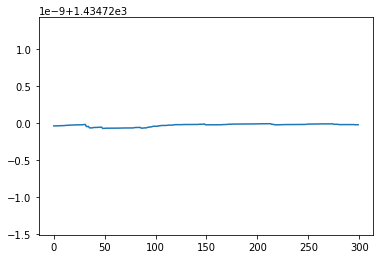

In [266]:
# Training
scores = []
for i in range(300):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 0:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [231]:
import numpy as np

# R matrix
R = np.matrix([ [-1,-1,-1,-1,0,-1],
		[-1,-1,-1,0,-1,100],
		[-1,-1,-1,0,-1,-1],
		[-1,0,0,-1,0,-1],
		[-1,0,0,-1,-1,100],
		[-1,0,-1,-1,0,100] ])

# Q matrix
Q = np.matrix(np.zeros([6,6]))
print('chirag',int(Q.shape[0]))
# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 

# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

#-------------------------------------------------------------------------------
# Training

# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0])) #slecting random step
    
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    print(Q)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
#print(Q)
Q = Q/np.max(Q)*100
print(Q)

#-------------------------------------------------------------------------------
# Testing

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]

while current_state != 5:
    #print('asdsad',Q[current_state,],np.max(Q[current_state,]))
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    #print(next_step_index.shape[0])
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

#-------------------------------------------------------------------------------
#                               OUTPUT
#-------------------------------------------------------------------------------
#
# Trained Q matrix:
#[[   0.     0.     0.     0.    80.     0. ]
# [   0.     0.     0.    64.     0.   100. ]
# [   0.     0.     0.    64.     0.     0. ]
# [   0.    80.    51.2    0.    80.     0. ]
# [   0.    80.    51.2    0.     0.   100. ]
# [   0.    80.     0.     0.    80.   100. ]]
#
# Selected path:
# [2, 3, 1, 5]
# 

chirag 6
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]]
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0

http://firsttimeprogrammer.blogspot.in/2016/09/getting-ai-smarter-with-q-learning.html